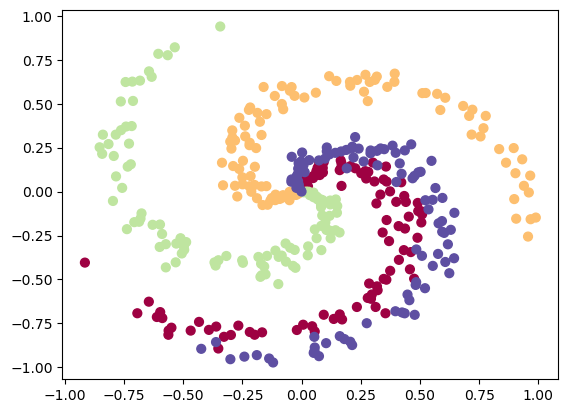

In [1]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [2]:
X.shape , y.shape

((400, 2), (400,))

In [3]:
 import torch 
from torch import nn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
X_use = torch.from_numpy(X).to(torch.float)
y_use = torch.from_numpy(y).to(torch.long)

In [5]:
X_use.dtype ,  y_use.dtype

(torch.float32, torch.int64)

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X_use , y_use , test_size=0.2,random_state=42)

In [7]:
len(X_train) , len(X_test) , len(y_train) ,len(y_test)

(320, 80, 320, 80)

# Model Building

In [8]:
class Spiral(nn.Module):
    def __init__(self,Feature,Classes,hidden=6):
        super().__init__()
        self.linear1 = nn.Linear(in_features=Feature,out_features=hidden)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(in_features=hidden , out_features=Classes)
    def forward(self , x:torch.tensor)->torch.tensor:
        return self.linear3(self.relu2(self.linear2(self.relu1(self.linear1(x)))))

In [9]:
torch.manual_seed(42)
model = Spiral(Feature=D,Classes=K)
model

Spiral(
  (linear1): Linear(in_features=2, out_features=6, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=6, out_features=6, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=6, out_features=4, bias=True)
)

In [10]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323]])),
             ('linear1.bias',
              tensor([ 0.5224,  0.0958,  0.3410, -0.0998,  0.5451,  0.1045])),
             ('linear2.weight',
              tensor([[-0.1906,  0.1041, -0.1881, -0.0479, -0.1658,  0.2708],
                      [-0.3223, -0.1882, -0.1153, -0.2455,  0.0385, -0.4032],
                      [ 0.3687, -0.3468,  0.3152,  0.0679, -0.1326,  0.2523],
                      [ 0.0636,  0.3298,  0.0446, -0.1288,  0.1097, -0.1107],
                      [ 0.1718,  0.3645,  0.2360, -0.1785,  0.2357,  0.0730],
                      [ 0.2073, -0.2488, -0.4041, -0.1577, -0.3131,  0.3350]])),
             ('linear2.bias',
              tensor([ 0.1176,  0.1691,  0.1291, -0.0071,  0.3195, -0.2

In [11]:
# selecting the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [12]:
# Training and testing
epochs = 4400

for epoch in range(epochs):
    model.train()
    
    ## Forward pass
    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits, dim=1 , dtype=torch.float).argmax(dim=1)
    
    ## Loss 
    loss = loss_fn(y_logits,y_train)
    
    ##optimizer 0 grad
    optimizer.zero_grad()
    
    ## Backward Propagation 
    loss.backward()
    
    ## Optimizer step 
    optimizer.step()
    
    ## Testing 
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits , dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits,y_test)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | train_loss: {loss} | test_loss: {test_loss}")

Epoch: 0 | train_loss: 1.4124562740325928 | test_loss: 1.363689661026001
Epoch: 100 | train_loss: 1.3273868560791016 | test_loss: 1.313948392868042
Epoch: 200 | train_loss: 1.2139395475387573 | test_loss: 1.2168207168579102
Epoch: 300 | train_loss: 1.114264726638794 | test_loss: 1.1212214231491089
Epoch: 400 | train_loss: 1.0594637393951416 | test_loss: 1.050313115119934
Epoch: 500 | train_loss: 1.0264112949371338 | test_loss: 1.0135504007339478
Epoch: 600 | train_loss: 0.9996432065963745 | test_loss: 0.9891258478164673
Epoch: 700 | train_loss: 0.9696394205093384 | test_loss: 0.9618501663208008
Epoch: 800 | train_loss: 0.9333168864250183 | test_loss: 0.9273420572280884
Epoch: 900 | train_loss: 0.8948761820793152 | test_loss: 0.8932878375053406
Epoch: 1000 | train_loss: 0.8575218915939331 | test_loss: 0.8566673398017883
Epoch: 1100 | train_loss: 0.8209840655326843 | test_loss: 0.8185288310050964
Epoch: 1200 | train_loss: 0.7801417112350464 | test_loss: 0.7797022461891174
Epoch: 1300 | t

In [13]:
# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    X, y = X, y

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))
    print(f"xx {xx.ravel().shape} , yy {yy.ravel().shape}")
    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
    print(f"x {X_to_pred_on.shape}")
    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.sigmoid(y_logits).argmax(dim=1) # binary
        # here the torch.round function was creating an problem
    
    print(f"xx {xx.shape} yy {yy.shape} y_pread {y_pred.shape}")

    # Reshape preds and plot
    y_pred = torch.reshape(y_pred,(101,101)).detach().numpy()
    print(f"xx {xx.shape} yy {yy.shape} y_pread {y_pred.shape}")
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

xx (10201,) , yy (10201,)
x torch.Size([10201, 2])
xx (101, 101) yy (101, 101) y_pread torch.Size([10201])
xx (101, 101) yy (101, 101) y_pread (101, 101)
xx (10201,) , yy (10201,)
x torch.Size([10201, 2])
xx (101, 101) yy (101, 101) y_pread torch.Size([10201])
xx (101, 101) yy (101, 101) y_pread (101, 101)


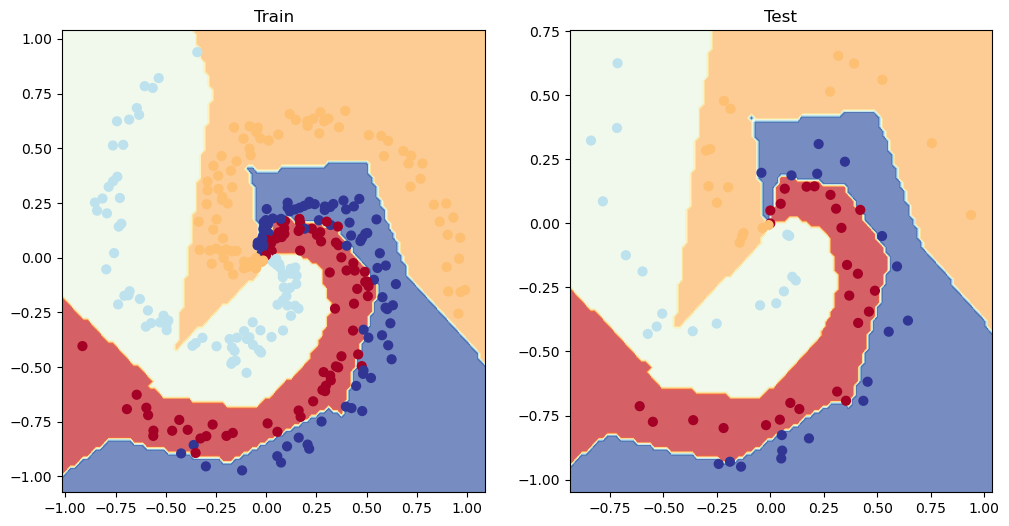

In [14]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)